In [276]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

# TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas.

In [277]:
def contador_de_monedas(img_dir):
    img = cv2.imread(img_dir)
    #OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Conversión a gris
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Suaviza altas frecuencias
    pimg = cv2.medianBlur(gris, 7)
    #Localiza Círculos
    circ = cv2.HoughCircles(
            pimg,  # imagen 
            cv2.HOUGH_GRADIENT,  # tipo de detección
            1, 100,  # distancia mínima entre círculos
            param1=80, # Valor del gradiente
            param2=50, #Umbral acumulador
            minRadius=5,  # radio mínimo
            maxRadius=200,  # radio máximo
        )

    #Dibuja sobre entrada  e imagen vacía
    img_cont = np.zeros(img_rgb.shape)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cont = 0
    for det in circ[0]:
            cont += 1
            x_coor, y_coor, det_radio = det
            cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
                int(det_radio),(0, 255, 0), 2)
            cv2.circle(img_cont,(int(x_coor), int(y_coor)),
                int(det_radio),(255, 255, 255), -1)

    #Muestra resultado
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.title('Círculos')

    plt.subplot(122)
    plt.axis("off")
    plt.imshow(img_cont) 
    plt.title('Rellenos')
    print("Número de monedas: ", cont)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número de monedas:  7


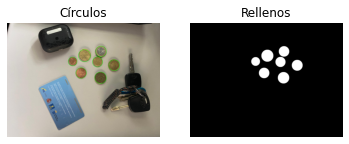

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número de monedas:  7


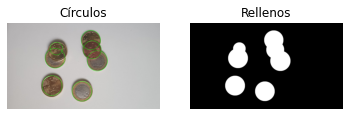

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número de monedas:  12


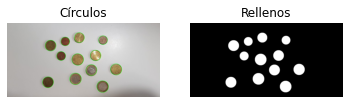

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número de monedas:  8


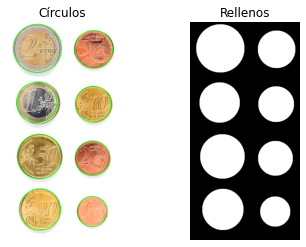

In [278]:
contador_de_monedas('Fotos/foto1.jpeg')
contador_de_monedas('Fotos/con solape.jpeg')
contador_de_monedas('Fotos/5.jpeg')
contador_de_monedas('P3/Monedas.jpg')

# TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen.

In [279]:
def show_picture(img, nombre, gray_flag):
    if(gray_flag):plt.imshow(img, cmap='gray')
    else: plt.imshow(img)
    plt.title(nombre)
    plt.axis("off")
    plt.show()
    
def draw_circle(img, img_cont, color, x, y, r):
    cv2.circle(img,(int(x), int(y)), int(r), color, 2)
    cv2.circle(img_cont,(int(x), int(y)), int(r), color, -1)
    
def draw_contornos(contornos, img, img_cont, color):
    cv2.drawContours(img, contornos, -1, color, 5)
    cv2.drawContours(img_cont, contornos, -1, color, -1)


In [280]:
# identifica las monedas de una imagen, (param1, param2, param3)
# param1: dirección de la imagen
# param2: moneda a identificar (0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1, 2) es una string
# param3: si es True, identifica todas las monedas, da igual el valor de param2

def draw_contour(x, y, r, img, contour, all, coin):
    if(((coin=="0.01") | (all)) & (r<65.0)): # 1cent
        draw_circle(img, contour, (255, 0, 0), x, y, r)
        print(" r: ", r*2, " 0.01")
        return 0.01
    
    elif(((coin=="0.02") | (all)) & (r>65.0) & (r<76.0)): # 2cent
        print(" r: ", r*2, " 0.02")
        draw_circle(img, contour, (255, 25, 25), x, y, r)
        return 0.02
    
    elif(((coin=="0.10") | (all)) & (r>76.0) & (r<80.0)): # 10cent
        print(" r: ", r*2, " 0.1")
        draw_circle(img, contour, (255, 50, 50), x, y, r)
        return 0.10
    
    elif(((coin=="0.05") | (all)) & (r>80.0) & (r<85.0)): # 5cent
        print(" r: ", r*2, " 0.05")
        draw_circle(img, contour, (225, 75, 50), x, y, r)
        return 0.05
    
    elif(((coin=="0.20") | (all)) & (r>85.0) & (r<90.0)): # 20cent
        print(" r: ", r*2, " 0.2")
        draw_circle(img, contour, (200, 100, 75), x, y, r)
        return 0.20
    
    elif(((coin=="1") | (all)) & (r>90.0) & (r<92.0)): # 1euro
        print(" r: ", r*2, " 1")
        draw_circle(img, contour, (150, 225, 100), x, y, r)
        return 1.0
    
    elif(((coin=="0.50") | (all)) & (r>92.0) & (r<95.0)): # 50cent
        print(" r: ", r*2, " 0.5")
        draw_circle(img, contour, (100, 225, 125), x, y, r)
        return 0.50
    
    elif(((coin=="2") | (all)) & (r>95.0)): # 2euros
        print(" r: ", r*2, " 2")
        draw_circle(img, contour, (100, 255, 150), x, y, r)
        return 2.0
    else: return 0.0

 r:  185.60000610351562  0.5
 r:  194.39999389648438  2
 r:  167.60000610351562  0.05
 r:  181.39999389648438  1
 r:  151.60000610351562  0.02
 r:  177.60000610351562  0.2
 r:  153.0  0.1
 r:  125.0  0.01
Nº de moneda:  8
Costo total:  3.88


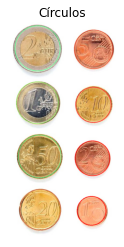

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


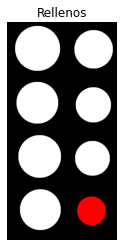

In [281]:
# identifica las monedas de una imagen, (param1, param2, param3)
# param1: dirección de la imagen
# param2: moneda a identificar (0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1, 2) es una string
# param3: si es True, identifica todas las monedas, da igual el valor de param2

def identificar_moneda(dir_img, moneda, todas):
    cont = 0
    dinero = 0.0
    img = cv2.imread(dir_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Conversión a gris
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Suaviza altas frecuencias
    pimg = cv2.GaussianBlur(gris, (5, 5), 1)
    #Localiza Círculos
    circ = cv2.HoughCircles(
            pimg,  # imagen 
            cv2.HOUGH_GRADIENT,  # tipo de detección
            1,
            80,  # distancia mínima entre círculos
            param1=70, # Valor del gradiente
            param2=70, #Umbral acumulador
            minRadius=0,  # radio mínimo
            maxRadius=100,  # radio máximo
        )

    #Dibuja sobre entrada  e imagen vacía
    img_cont = np.zeros(img_rgb.shape)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for det in circ[0]:
        cont+=1
        x_coor, y_coor, det_radio = det
        
        dinero += draw_contour(x_coor, y_coor, det_radio, img_rgb, img_cont, todas, moneda)

        # cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
        #     int(det_radio),(0, 255, 0), 2)
        # cv2.circle(img_cont,(int(x_coor), int(y_coor)),
        #     int(det_radio),(255, 255, 255), -1)

    print("Nº de moneda: ", cont)
    print("Costo total: ", dinero)
    #Muestra resultado
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.title('Círculos')
    plt.show()

    plt.axis("off")
    plt.imshow(img_cont) 
    plt.title('Rellenos')
    plt.show()
    
identificar_moneda('P3/Monedas.jpg', "0.01", True)

# Otro intento con fotos de otra manera

In [282]:
def contar_dinero(all, coin, img, x, y, r, contornos):
    if(((coin=="0.01") | (all)) & (r<50.0)): # 1cent
        cv2.drawContours(img, [contornos], -1, (0,75,150), 5)
        # print(" r: ", round(r,2), " 0.01")
        return 0.01,1
    
    elif(((coin=="0.02") | (all)) & (r>50.0) & (r<53.0)): # 2cent
        cv2.drawContours(img, [contornos], -1, (75,0,250), 5)
        # print(" r: ", round(r,2), " 0.02")
        return 0.02,1
    
    elif(((coin=="0.10") | (all)) & (r>53.0) & (r<56.0)): # 10cent
        cv2.drawContours(img, [contornos], -1, (250,25,75), 5)
        # print(" r: ", round(r,2), " 0.1")
        return 0.10,1
    
    elif(((coin=="0.05") | (all)) & (r>56.0) & (r<59.0)): # 5cent
        cv2.drawContours(img, [contornos], -1, (250,75,25), 5)
        # print(" r: ", round(r,2), " 0.05")
        return 0.05,1
    
    elif(((coin=="0.20") | (all)) & (r>59.0) & (r<62.0)): # 20cent
        cv2.drawContours(img, [contornos], -1, (75,250,120), 5)
        # print(" r: ", round(r,2), " 0.2")
        return 0.20,1
    
    elif(((coin=="1") | (all)) & (r>62.0) & (r<65.35)): # 1euro
        cv2.drawContours(img, [contornos], -1, (250,100,75), 5)
        # print(" r: ", round(r,2), " 1")
        return 1.0,1
    
    elif(((coin=="0.50") | (all)) & (r>65.35) & (r<67.0)): # 50cent
        cv2.drawContours(img, [contornos], -1, (75,125,255), 5)
        # print(" r: ", round(r,2), " 0.5")
        return 0.50,1
    
    elif(((coin=="2") | (all)) & (r>67.0)): # 2euros
        cv2.drawContours(img, [contornos], -1, (255,0,255), 5)
        # print(" r: ", round(r,2), " 2")
        return 2.0,1
    
    else: 
        # print(" r: ", round(r,2), "0")
        return 0.0,0

Nº de moneda:  4
Costo total:  0.08


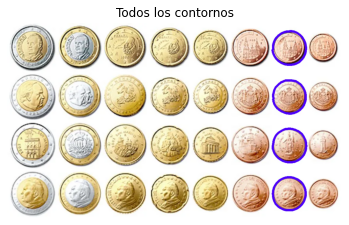

In [283]:
# identifica las monedas de una imagen, (param1, param2, param3)
# param1: dirección de la imagen
# param2: moneda a identificar (0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1, 2) es una string
# param3: si es True, identifica todas las monedas, da igual el valor de param2
from numpy import true_divide


def identificar_moneda(dir_img, moneda, todas):
    cont = 0
    dinero = 0.0
    img = cv2.imread(dir_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # show_picture(img_rgb, "Imagen Original", False)
    
    #Conversión a gris
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # show_picture(gris, "Imagen en Gris", True)
    
    #Suaviza altas frecuencias
    pimg = cv2.GaussianBlur(gris, (5, 5), 1)
    # show_picture(pimg, "Imagen Suavizada", True)
    
    umbral = cv2.threshold(pimg,240,255,cv2.THRESH_BINARY_INV)[1]
    #show_picture(umbral, "Imagen Umbralizada", True)
    
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    img_cont = np.zeros(img_rgb.shape)
    
    for c in contornos:
        #Área
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        dinero0, cont0 = contar_dinero(todas, moneda, img_rgb, cx, cy, radio, c)  
        dinero += dinero0
        cont += cont0          

    print("Nº de moneda: ", cont)
    print("Costo total: ", dinero)
    
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.title('Todos los contornos')
    plt.show()
    
identificar_moneda('Fotos/diferentes tipos.webp', "0.02", False)

Nos hemos encontrado en la situación de que hay monedas de 50 céntimos que no se detectan bien, y se confunden con monedas 1 Euro y de 20 céntimos. Hemos probado con las fotos ubicadas en "Fotos/", y para la mayoría de fotos encontramos que el radio de algunas monedas suele dar errores en algún tipo, sobretodo la diferencia entre la de 10 centimos y la de 5 céntimos, y la de 1 euro y la de 50 céntimos. 

Por ejemplo, en la foto "7 sin solape.jpeg" nos encontramos que el error se encuentra sobretodo en las monedas de 0.10 y 0.02 céntimos, y en la foto con solape.

Hemos sido capaces de hacer que se identifiquen las monedas con la imagen por defecto "P3/Monedas.jpg", por lo que la lógica de lo que estamos probando no debería estar desencaminada, pero hemos invertido muchísimo tiempo y el ejercicio anterior ha sido el que mejor resultado nos ha dado.

# TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa con las imágenes completas la matriz de confusión.

In [284]:
#draw a rombo with cv2
def draw_a_rectangle(x,y, w,h, img):
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,150),5)
    
def draw_an_ellipse(ellipse, img):
    cv2.ellipse(img,ellipse,(255,75,255),5)

## Funciones de contornos

In [285]:
def contornos_fragmentos(img_dir):
    imgF = cv2.imread(img_dir)
    imgF_rgb = cv2.cvtColor(imgF, cv2.COLOR_BGR2RGB)
    imgF_gris = cv2.cvtColor(imgF, cv2.COLOR_BGR2GRAY)

    _,umbralF = cv2.threshold(imgF_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contornosF, _ = cv2.findContours(umbralF, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    imgF_cont = np.zeros(imgF.shape)

    count = 0
    for c in contornosF:
        area = cv2.contourArea(c)
        if area > 500:
            perimetro = cv2.arcLength(c,True)
            if(perimetro < 2000):
                count += 1
                x,y,w,h = cv2.boundingRect(c)
                cv2.drawContours(imgF_cont, [c], -1, (255,255,255), -1)
                draw_a_rectangle(x,y, w,h, imgF_cont)
    plt.axis("off")
    plt.imshow(imgF_cont)
    plt.title('Fragment')
    plt.show()
    print("Total de fragmentos: ", count)

In [286]:
def contornos_pellet(img_dir):
    imgP = cv2.imread(img_dir)
    imgP_rgb = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)
    imgP_gris = cv2.cvtColor(imgP, cv2.COLOR_BGR2GRAY)

    _,umbralP = cv2.threshold(imgP_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contornosP, _ = cv2.findContours(umbralP, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    imgP_cont = np.zeros(imgP.shape)

    count = 0
    for c in contornosP:
        area = cv2.contourArea(c)
        if area > 500:
            perimetro = cv2.arcLength(c,True)
            if(perimetro < 600):
                count+=1
                elipse = cv2.fitEllipse(c)
                draw_an_ellipse(elipse, imgP_cont)
                cv2.drawContours(imgP_cont, [c], -1, (200,100,100), -1)
    
    plt.axis("off")
    plt.imshow(imgP_cont)
    plt.title('Fragment')
    plt.show()
    
    print("Total de pettles: ", count)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


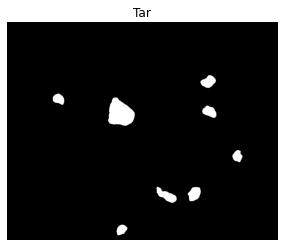

In [287]:
imgT = cv2.imread('P3/TAR.png')
imgT_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
# plt.axis("off")
# plt.imshow(imgT_rgb)
# plt.title('Tar')
# plt.show()
imgT_gris = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

_,umbralT = cv2.threshold(imgT_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contornosT, _ = cv2.findContours(umbralT, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
imgT_cont = np.zeros(imgT.shape)

for c in contornosT:
        area = cv2.contourArea(c)
        if area > 500:
            perimetro = cv2.arcLength(c,True)
            if(perimetro < 600):
                elipse = cv2.fitEllipse(c)
                #draw_an_ellipse(elipse, imgT_cont)
                cv2.drawContours(imgT_cont, [c], -1, (200,20,750), -1)

plt.axis("off")
plt.imshow(imgT_cont)
plt.title('Tar')
plt.show()

In [312]:
matriz = ["Fragmentos", [0, 0, 0]],["Pellet", [0, 0, 0]],["Tar", [0, 0, 0]]
def test(img_dir, indice):
    img = cv2.imread(img_dir)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,umbral = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    img_cont = np.zeros(img.shape)
    
    mean, c = 0,0
    for c in contornos: 
        area = cv2.contourArea(c)
        if area > 500:
            perimetro = cv2.arcLength(c,True)
            if(perimetro < 2000):
                epsilon = 0.01*cv2.arcLength(c,True)
                approx = cv2.approxPolyDP(c,epsilon,True)
                x,y,w,h = cv2.boundingRect(approx)
                
                # print(len(approx))
                
                if(len(approx) <= 12): matriz[indice][1][0] += 1
                elif(len(approx) > 15): matriz[indice][1][1] +=  1
                else: matriz[indice][1][2] += 1
    # print("--------------------------------------------")
                
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


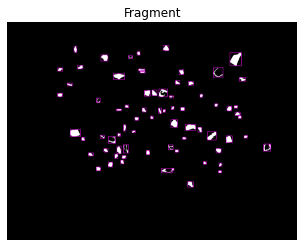

Total de fragmentos:  73


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


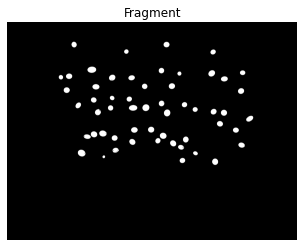

Total de pettles:  55


In [289]:
contornos_fragmentos('P3/fragment-03-olympus-10-01-2020.JPG')
contornos_pellet('P3/pellet-03-olympus-10-01-2020.JPG')

In [313]:
test("P3/fragment-03-olympus-10-01-2020.JPG", 0)
test("P3/pellet-03-olympus-10-01-2020.JPG", 1)
test("P3/tar-03-olympus-10-01-2020.JPG", 2)

print("{:<15} {:<10} {:<10} {:<10}".format("Tipo", "Fragment", "Pellet", "Tar"))
for v in matriz:
    print("{:<15} {:<10} {:<10} {:<10}".format(v[0], v[1][0], v[1][1], v[1][2]))


Tipo            Fragment   Pellet     Tar       
Fragmentos      28         19         26        
Pellet          32         9          14        
Tar             45         0          8         


No hemos sido capaces de encontrar una figura con la que pueda llegar a coincidir todas las tomas.
La idea creo que no es mala. Sabiendo que "tienen" una figura en común, se podría cribar los contornos mediante los lados de la figura.